# [Lab Session 2](otsu.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**[Task 1.1.]()** Load the image:

In [20]:
imgf = plt.imread('data/NIH3T3/im/dna-0.png')
#plt.figure(figsize=(15,8))
#plt.imshow(imgf);

**[Task 1.2.]()** Quantify the image into 256 bins:

In [3]:
img8 = (imgf * 255).round().astype(np.uint8)

**[Task 1.3.]()** Compute the image histogram:

In [16]:
h_flat = img8.flatten()
h = np.zeros(256)
for pixel_value in h_flat:
    h[pixel_value] += 1


Show the computed histogram:

<BarContainer object of 256 artists>

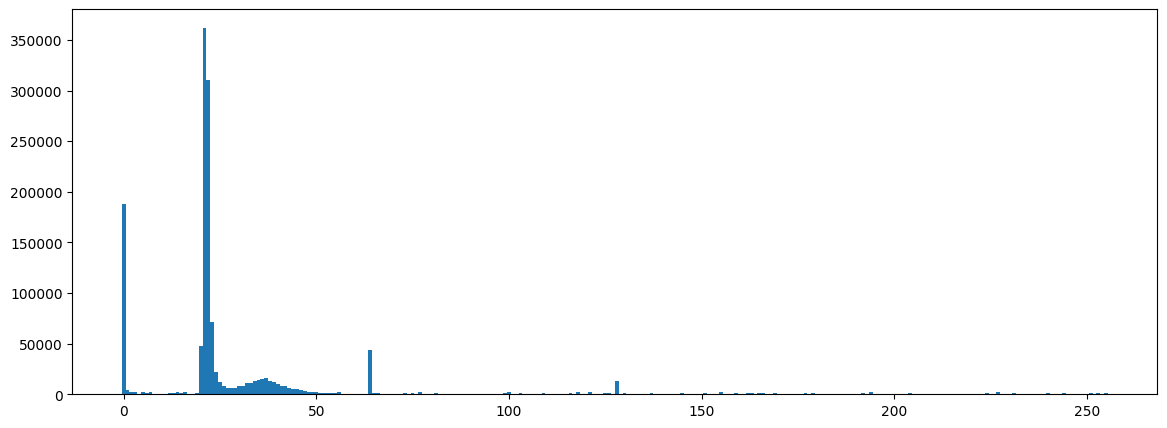

In [17]:
plt.figure(figsize=(14,5))
plt.bar(range(256), h, width=1)

**[Task 1.4.]()** Implement the method of Otsu:

**[Task 1.5.]()** Perform Otsu thresholding:

**[Task 1.6.]()** Compute the Dice coefficient: